# Trabalho de Tratamento de Dados

## Contexto de pesquisa

    Para uma contextualização, vou começar explicando de forma geral o que estou fazendo nessa parte do meu trabalho.   
    Durante a minha pesquisa eu uso dados simulados do Illustis e, nessa parte do projeto, eu busco comparar os dados que eu obtive com dados observados. 
    Me baseei bastante no artigo de Whitaker, onde ela conseguiu criar uma equação que traçava o comportamento das galáxias de acordo com o seu redshift. Com isso, decidimos comparar essa relação de Whitaker e ver se nossos dados se comportariam como esperado e ver qual das equações (ajuste) melhor se encaixa com os nossos dados simulados.

## Roteiro

 1. Importamos os dados 
 2. Definimos as funções de Whitaker
 3. Plotamos nossos dados junto com as funções 
 4. Definir uma reta com o melhor ajuste
 5. Vendo qual função tem o menor $\chi^2$

## Vizualisando os dados

In [1]:
import pandas as pd
import math
import numpy as np
import pylab as plt
from tqdm import tqdm

### Importando os dados

    Nesse caso, mstar é a massa estelar, sfr_c1e é a taxa de formação estelar e z é o redshift

In [2]:
mstar_c1e = np.loadtxt("C:\\Users\\biaca\\Pesquisa\\mstar.txt")
sfr_c1e = np.loadtxt("C:\\Users\\biaca\\Pesquisa\\sfr.txt")
z_c1e = np.loadtxt("C:\\Users\\biaca\\Pesquisa\\redshift.txt")

### Gerando funções de Whitaker

    De modo geral a equação do artigo se dá por: 

### $$ Whitaker =alpha*(x -10.5) + beta $$

    onde alpha e beta são definidos como:

### $$alpha = 0.70 - 0.13*(z)$$      
### $$beta = 0.38 + 1.14*(z) - 0.19*(z)**2$$

    Com isso, podemos fazer o código para gerar essas funções

In [3]:
#Criando uma lista com os redshift que queremos usar

z_c1w = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]

In [4]:
# Definindo a equação de Whitaker e pedindo para retornar uma lista com alpha e beta

def whitaker(z_c1w):
    alpha = 0.70 - 0.13*(z_c1w)
    beta = 0.38 + 1.14*(z_c1w) - 0.19*(z_c1w)**2 
    return (alpha,beta)

In [5]:
y_modelo=[]

#Criando um loop para rodar todos os redshift e gerar as linhas com os respctivos alphas e betas

for i in tqdm(np.arange(0,6,1), 'Criando Retas'):
    
    whi = whitaker(z_c1w[i])   #Rodadando os redshifts 
    
    função=whi[0]*(np.log10(mstar_c1e)-10.5) + whi[1]   #Substituindo alpha (whi[0]) e beta (whi[1]) na função
    
    y_modelo.append(função)   #Colocando as funções em forma de array dentro de uma variável
    


Criando Retas: 100%|████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 382.16it/s]


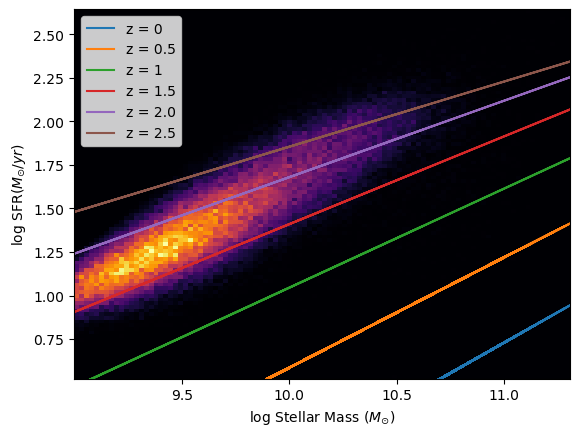

In [6]:
# Gerando o gráfico

plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.ylabel('log SFR($M_{\odot}/yr$)')


plt.plot(np.log10(mstar_c1e),y_modelo[0])
plt.plot(np.log10(mstar_c1e), y_modelo[1])
plt.plot(np.log10(mstar_c1e), y_modelo[2])
plt.plot(np.log10(mstar_c1e),y_modelo[3])
plt.plot(np.log10(mstar_c1e),y_modelo[4])
plt.plot(np.log10(mstar_c1e),y_modelo[5])

plt.hist2d(np.log10(mstar_c1e),np.log10(sfr_c1e), cmap='inferno', bins=100)
plt.legend(["z = 0", "z = 0.5", "z = 1", "z = 1.5", "z = 2.0", "z = 2.5", ], loc = "upper left")
  
plt.show()

### Gerando o melhor ajuste

    Como próximo passo, vamos gerar uma reta que melhor se ajusta aos nossos dados e faremos uma comparação com as funções de Whitaker para ver qual tem o menor chi quadrado, pois sabemos que um bom ajuste tem o menor chi quadrado possível  

In [7]:
# Definindo a função de uma reta
def reta(x, b0, b1):
    y = b0 + b1*x
    return y

    Usando o método de Monte Carlo para maior eficiência:

In [8]:
# Gerando os valores de b0 e b1 

b0 = np.random.uniform(-8,-4,10000)
b1 = np.random.uniform(0.6,1.0,10000)

In [9]:
S=[]

for i in tqdm(range(len(b0)), 'Ajustando uma reta'):
    y_mod = reta(x=np.log10(mstar_c1e), b0=b0[i], b1=b1[i]) #Gerando uma reta com os valores de b0 e b1 do random
    
    res = np.log10(sfr_c1e) - y_mod #Conferindo o resíduo (dados - reta modelo)
    
    S = np.append(S, np.sum(res**2)) # Fazendo o mínimo quadrado do resíduo

Ajustando uma reta: 100%|███████████████████████████████████████████████████████| 10000/10000 [00:16<00:00, 591.19it/s]


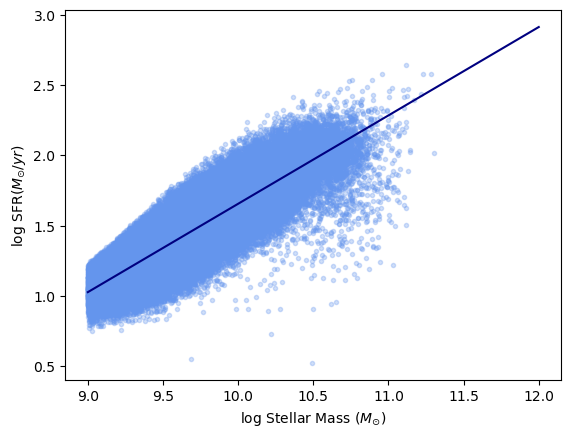

In [10]:
# Plotando o gráfico para conferir se a reta está bem ajustados

plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.ylabel('log SFR($M_{\odot}/yr$)')

xx = np.linspace(9.0, 12.0)

plt.plot(np.log10(mstar_c1e),np.log10(sfr_c1e), '.', color='cornflowerblue', alpha=0.3)
plt.plot(xx, b1[S.argmin()]*xx + b0[S.argmin()], '-', color='navy')
plt.show()

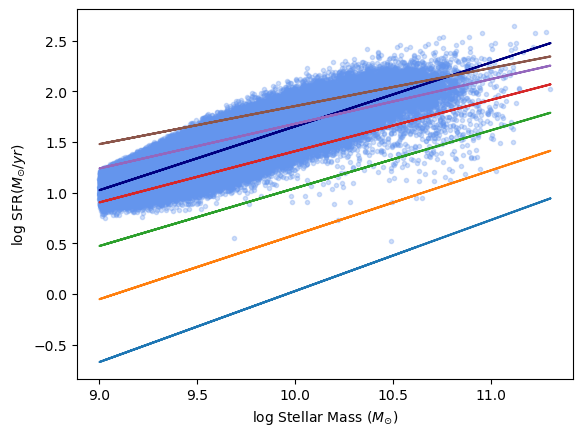

In [11]:
# Plotando a melhor reta junto com as funções de Whitaker para ter uma ideia de qual será o melho ajuste
y_mod = reta(x=np.log10(mstar_c1e), b0=b0[S.argmin()], b1 = b1[S.argmin()])


plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.ylabel('log SFR($M_{\odot}/yr$)')

plt.plot(np.log10(mstar_c1e),np.log10(sfr_c1e), '.', color='cornflowerblue', alpha=0.3)
plt.plot(np.log10(mstar_c1e),y_mod, '-', color='navy')

plt.plot(np.log10(mstar_c1e), y_modelo[0])
plt.plot(np.log10(mstar_c1e), y_modelo[1])
plt.plot(np.log10(mstar_c1e), y_modelo[2])
plt.plot(np.log10(mstar_c1e), y_modelo[3])
plt.plot(np.log10(mstar_c1e), y_modelo[4])
plt.plot(np.log10(mstar_c1e), y_modelo[5])

plt.show()

### Menor $\chi^2$

    Vamos então verificar quais das funções tem o menor chi quadrado, que se dá pela função:

## $$\chi^2 = \sum{\frac{(y - y_{modelo})^2}{sig^2}}$$

In [12]:
#Primeiro vamos verificar os mínimos quadrados dos Resíduos

for i in tqdm(np.arange(0,6,1), 'Verificando o min. quad. dos Resíduos'): 
    
    print('{:.3e}'.format(np.sum((np.log10(sfr_c1e) - y_modelo[i])**2)))  

Verificando o min. quad. dos Resíduos: 100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 351.58it/s]

2.733e+05
1.163e+05
3.643e+04
6.219e+03
3.495e+03
1.156e+04


    Com todos esses dados em mãos podemos encontrar o sigma que era o que faltava para calcular o chi quadrado

In [13]:
#Encontrando sigma

sig = np.std(np.log10(sfr_c1e)-y_mod)
print(sig)

0.14219205854438907


In [14]:
chi_total=[]

for i in tqdm(np.arange(0,6,1), 'Verificando o Chi'):
    
    chi = np.sum (((np.log10(sfr_c1e) - y_modelo[i])**2)/sig**2) #Calculando o chi para todas as funções
    
    print('Chi de Witaker para redshift {:.1f} : \n {:.3e}'.format(z_c1w[i], chi), '\n')
    
    chi_total.append(chi) #Colocando todos os resultados em um variável

Verificando o Chi: 100%|████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 330.50it/s]

Chi de Witaker para redshift 0.0 : 
 1.352e+07 

Chi de Witaker para redshift 0.5 : 
 5.750e+06 

Chi de Witaker para redshift 1.0 : 
 1.802e+06 

Chi de Witaker para redshift 1.5 : 
 3.076e+05 

Chi de Witaker para redshift 2.0 : 
 1.729e+05 

Chi de Witaker para redshift 2.5 : 
 5.716e+05 



### Resultado

    Podemos ver então que dentre as funções que temos de Whitaker, a que melhor se ajusta é:

In [15]:
print('Chi de Witaker para redshift {:.1f} : \n'.format(z_c1w[np.argmin(chi_total)]), np.min(chi_total), '\n')

Chi de Witaker para redshift 2.0 : 
 172853.36940631556 

